In [1]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns


#https://altair-viz.github.io/gallery/errorbars_with_std.html
#import altair as alt
#from vega_datasets import data

#defining paths
results_milestones = 'Milestones - timesStandard.csv'
dataBinary_milestones = pd.read_csv(results_milestones)


In [2]:
dataBinary_milestones

,Participant,start,issue,problem,folder,file,classe,method,line,solution,implement,end,Gift card requested,Gift card received,group,issue_number,Control YOE,Control Contribs,Alt YOE,Alt Contrib
0,ItaloSantos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,Control,5679,4.0,0.0,NaN,NaN
1,FelipeFelixSantos@gmail.com,10:15 AM,2.0,3.0,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55.0,NaN,y,Treatment,5485,NaN,NaN,7.0,0.0
2,gk325@nau.edu,3:09:00 PM,1.0,6.0,56.0,56.0,58.0,58.0,58.0,58.0,58.0,58.0,NaN,y,Treatment,4612,3.0,0.0,NaN,NaN
3,sb3292@nau.edu,4:21:00 PM,3.0,19.0,23.0,23.0,23.0,27.0,27.0,46.0,46.0,46.0,NaN,y,Treatment,5194,NaN,NaN,9.0,9.0
4,gummadisk99@gmail.com,1:20 PM,4.0,14.0,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56.0,NaN,y,Control,4612,1.0,1.0,NaN,NaN
5,hk486@nau.edu,3:22 PM,20.0,25.0,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38.0,NaN,y,Treatment,5069,NaN,NaN,4.0,2.0
6,ap3535@nau.edu,4:17 PM,6.0,12.0,27.0,27.0,29.0,40.0,41.0,43.0,54.0,54.0,NaN,y,Control,5485,NaN,NaN,NaN,NaN
7,kv582@nau.edu,12:44 PM,11.0,19.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,NaN,y,Control,5485,1.0,1.0,NaN,NaN
8,vg588@nau.edu,4:34 PM,5.0,25.0,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46.0,NaN,y,Treatment,5485,NaN,NaN,2.0,0.0
9,ma3932@nau.edu,4:13 PM,7.0,33.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58.0,NaN,NaN,Treatment,5485,NaN,NaN,5.0,1.0


In [3]:
#checking if I have to remove the NaN. Removing jk2396 to calculate the 'method' mean 

In [4]:
dataBinary_milestones_valid = dataBinary_milestones[['Participant','start','issue','problem','folder','file','classe','method','line','solution','implement','end','group','issue_number']]

In [5]:
dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'ap3535@nau.edu'].index, inplace = True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
dataBinary_milestones_valid

,Participant,start,issue,problem,folder,file,classe,method,line,solution,implement,end,group,issue_number
0,ItaloSantos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control,5679
1,FelipeFelixSantos@gmail.com,10:15 AM,2.0,3.0,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55.0,Treatment,5485
2,gk325@nau.edu,3:09:00 PM,1.0,6.0,56.0,56.0,58.0,58.0,58.0,58.0,58.0,58.0,Treatment,4612
3,sb3292@nau.edu,4:21:00 PM,3.0,19.0,23.0,23.0,23.0,27.0,27.0,46.0,46.0,46.0,Treatment,5194
4,gummadisk99@gmail.com,1:20 PM,4.0,14.0,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56.0,Control,4612
5,hk486@nau.edu,3:22 PM,20.0,25.0,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38.0,Treatment,5069
7,kv582@nau.edu,12:44 PM,11.0,19.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,Control,5485
8,vg588@nau.edu,4:34 PM,5.0,25.0,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46.0,Treatment,5485
9,ma3932@nau.edu,4:13 PM,7.0,33.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58.0,Treatment,5485
10,"nk545@nau,edu",3:14 PM,7.0,22.0,25.0,25.0,37.0,46.0,57.0,NaN,NaN,57.0,Control,5069


In [7]:

#dataBinary_milestones_valid[['issue','problem','folder','file','classe','method','line','solution','implement','end']].plot(kind='line',  ms=10)

#plt.show()

In [8]:
#dataBinary_milestones_valid['issue'].plot(kind='line',  ms=10)

#plt.show()

In [9]:
dataBinary_milestones_valid.groupby(['group']).mean()

,issue,problem,folder,file,classe,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,9.800,17.400,37.000,37.000,39.400,41.800000,47.250000,47.0,49.000000,51.000,5157.00
Treatment,6.125,22.125,40.125,40.625,40.875,41.857143,42.428571,47.0,46.833333,52.125,5259.75


In [16]:
dataBinary_milestones_valid_jk2396 = dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'jk2396@nau.edu'].index)


In [17]:
dataBinary_milestones_valid_jk2396

,Participant,start,issue,problem,folder,file,classe,method,line,solution,implement,end,group,issue_number
0,ItaloSantos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control,5679
1,FelipeFelixSantos@gmail.com,10:15 AM,2.0,3.0,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55.0,Treatment,5485
2,gk325@nau.edu,3:09:00 PM,1.0,6.0,56.0,56.0,58.0,58.0,58.0,58.0,58.0,58.0,Treatment,4612
3,sb3292@nau.edu,4:21:00 PM,3.0,19.0,23.0,23.0,23.0,27.0,27.0,46.0,46.0,46.0,Treatment,5194
4,gummadisk99@gmail.com,1:20 PM,4.0,14.0,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56.0,Control,4612
5,hk486@nau.edu,3:22 PM,20.0,25.0,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38.0,Treatment,5069
7,kv582@nau.edu,12:44 PM,11.0,19.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,Control,5485
8,vg588@nau.edu,4:34 PM,5.0,25.0,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46.0,Treatment,5485
9,ma3932@nau.edu,4:13 PM,7.0,33.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58.0,Treatment,5485
10,"nk545@nau,edu",3:14 PM,7.0,22.0,25.0,25.0,37.0,46.0,57.0,NaN,NaN,57.0,Control,5069


In [18]:
#dataBinary_milestones_valid_jk2396 = dataBinary_milestones_valid_jk2396['method']

In [19]:
dataBinary_milestones_valid_jk2396[['method','group']].groupby(['group']).mean()

,method
group,
Control,41.800000
Treatment,41.857143


In [20]:
dataBinary_milestones_valid_T = dataBinary_milestones_valid[dataBinary_milestones_valid.group == 'Treatment']

In [21]:
dataBinary_milestones_valid_C = dataBinary_milestones_valid[dataBinary_milestones_valid.group == 'Control']

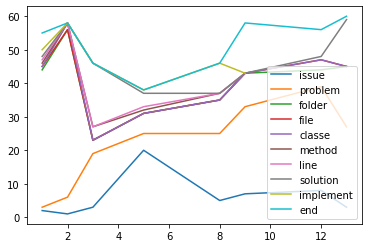

In [22]:
dataBinary_milestones_valid_T[['issue','problem','folder','file','classe','method','line','solution','implement','end']].plot(kind='line',  ms=10)

plt.show()

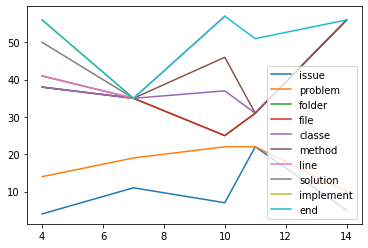

In [23]:
dataBinary_milestones_valid_C[['issue','problem','folder','file','classe','method','line','solution','implement','end']].plot(kind='line',  ms=10)

plt.show()

In [24]:
dataBinary_milestones_valid.groupby(['issue_number']).mean()

,issue,problem,folder,file,classe,method,line,solution,implement,end
issue_number,,,,,,,,,,
4612,9.000000,14.000000,41.666667,41.666667,42.333333,43.333333,49.5,54.0,57.0,55.000000
5069,11.666667,28.666667,33.333333,34.333333,38.333333,39.000000,45.0,42.5,38.0,50.333333
5194,3.000000,19.000000,23.000000,23.000000,23.000000,27.000000,27.0,46.0,46.0,46.000000
5485,6.000000,18.000000,42.600000,42.800000,42.800000,43.400000,43.6,43.8,46.0,50.000000
5679,3.000000,27.000000,45.000000,45.000000,45.000000,50.000000,52.0,59.0,NaN,60.000000


In [25]:
dataBinary_milestones_valid.groupby(['group','issue_number']).mean()

issue    problem     folder  file  classe  method  \
group     issue_number                                                          
Control   4612          13.000000  18.000000  34.500000  34.5    34.5    36.0   
          5069           7.000000  22.000000  25.000000  25.0    37.0    46.0   
          5485           8.000000  14.500000  45.500000  45.5    45.5    45.5   
          5679                NaN        NaN        NaN   NaN     NaN     NaN   
Treatment 4612           1.000000   6.000000  56.000000  56.0    58.0    58.0   
          5069          14.000000  32.000000  37.500000  39.0    39.0    32.0   
          5194           3.000000  19.000000  23.000000  23.0    23.0    27.0   
          5485           4.666667  20.333333  40.666667  41.0    41.0    42.0   
          5679           3.000000  27.000000  45.000000  45.0    45.0    50.0   

                             line   solution  implement   end  
group     issue_number                                         
Control   4612          41.000000  50.000000  56.000000  53.5  
          5069          57.000000        NaN        NaN  57.0  
          5485          45.500000  45.500000  45.500000  45.5  
          5679                NaN        NaN        NaN   NaN  
Treatment 4612          58.000000  58.000000  58.000000  58.0  
          5069          33.000000  42.500000  38.000000  47.0  
          5194          27.000000  46.000000  46.000000  46.0  
          5485          42.333333  42.666667  46.333333  53.0  
          5679          52.000000  59.000000        NaN  60.0

In [26]:
dataBinary_milestones_valid_T.groupby(['issue_number']).mean()

,issue,problem,folder,file,classe,method,line,solution,implement,end
issue_number,,,,,,,,,,
4612,1.000000,6.000000,56.000000,56.0,58.0,58.0,58.000000,58.000000,58.000000,58.0
5069,14.000000,32.000000,37.500000,39.0,39.0,32.0,33.000000,42.500000,38.000000,47.0
5194,3.000000,19.000000,23.000000,23.0,23.0,27.0,27.000000,46.000000,46.000000,46.0
5485,4.666667,20.333333,40.666667,41.0,41.0,42.0,42.333333,42.666667,46.333333,53.0
5679,3.000000,27.000000,45.000000,45.0,45.0,50.0,52.000000,59.000000,NaN,60.0


In [29]:
dataBinary_milestones_valid_C.groupby(['issue_number']).mean()

,issue,problem,folder,file,classe,method,line,solution,implement,end
issue_number,,,,,,,,,,
4612,13.0,18.0,34.5,34.5,34.5,36.0,41.0,50.0,56.0,53.5
5069,7.0,22.0,25.0,25.0,37.0,46.0,57.0,NaN,NaN,57.0
5485,8.0,14.5,45.5,45.5,45.5,45.5,45.5,45.5,45.5,45.5
5679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
T_mean = dataBinary_milestones_valid_T.groupby(['issue_number']).mean()

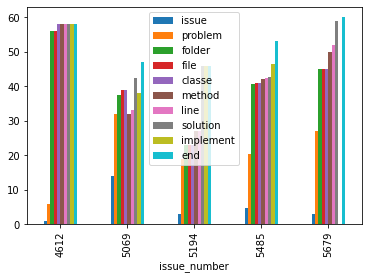

In [31]:
T_mean[['issue','problem','folder','file','classe','method','line','solution','implement','end']].plot(kind='bar')

plt.show()

In [32]:
C_mean = dataBinary_milestones_valid_C.groupby(['issue_number']).mean()

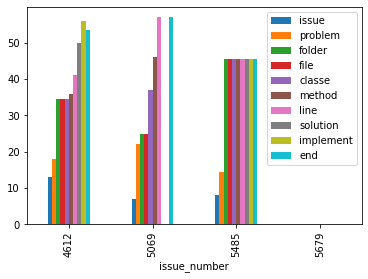

In [33]:
C_mean[['issue','problem','folder','file','classe','method','line','solution','implement','end']].plot(kind='bar')

plt.show()

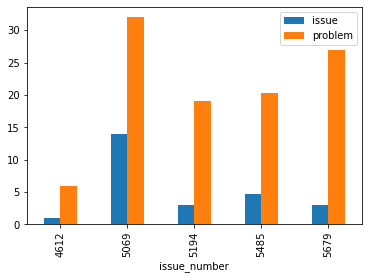

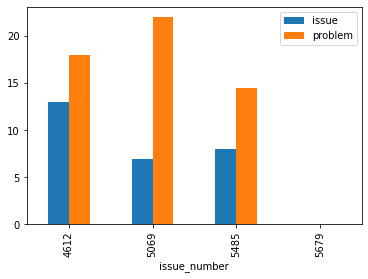

In [34]:
T_mean[['issue','problem']].plot(kind='bar')
C_mean[['issue','problem']].plot(kind='bar')

plt.show()

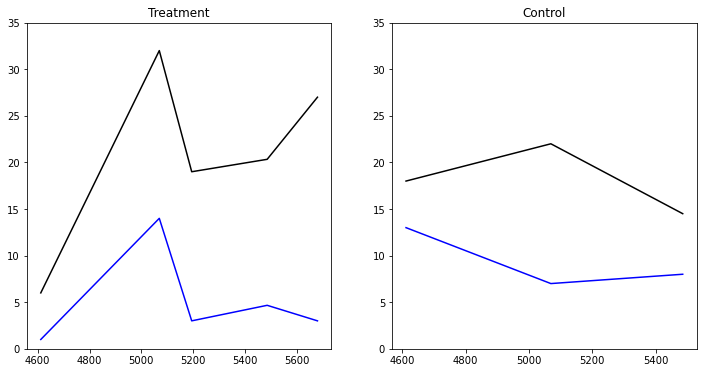

In [35]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.set_title('Treatment')
ax.plot(T_mean['issue'], color='blue', label='Treatment issue')
ax.plot(T_mean['problem'], color='black', label='Treatment problem')

ax2.set_title('Control')
ax2.plot(C_mean['issue'], color='blue', label='Control issue')
ax2.plot(C_mean['problem'], color='black', label='Control problem')

ax.set_ylim([0, 35])
ax2.set_ylim([0, 35])

plt.show()


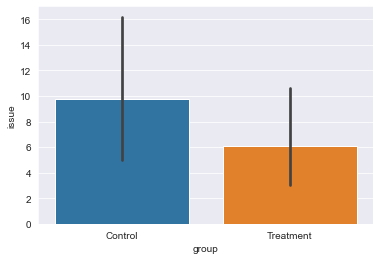

In [36]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "issue", data = dataBinary_milestones_valid)
plt.show()

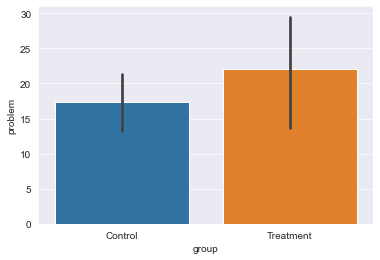

In [37]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "problem", data = dataBinary_milestones_valid)
plt.show()

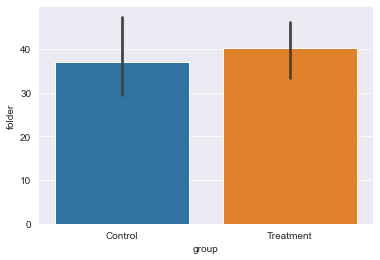

In [38]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "folder", data = dataBinary_milestones_valid)
plt.show()

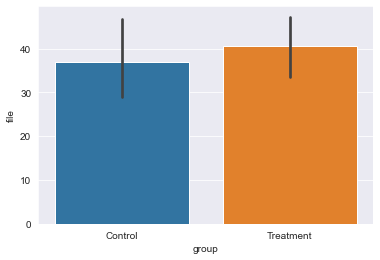

In [39]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "file", data = dataBinary_milestones_valid)
plt.show()

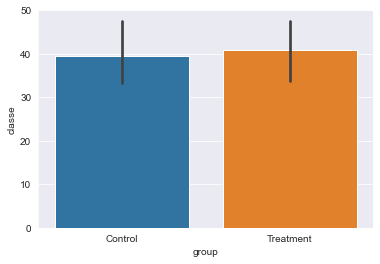

In [40]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "classe", data = dataBinary_milestones_valid)
plt.show()

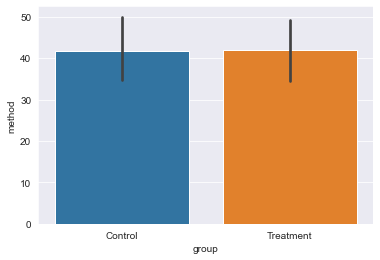

In [41]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "method", data = dataBinary_milestones_valid)
plt.show()

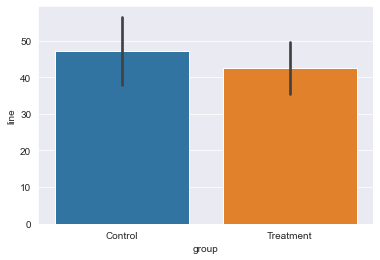

In [42]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "line", data = dataBinary_milestones_valid)
plt.show()

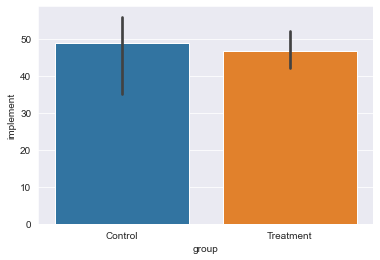

In [43]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "implement", data = dataBinary_milestones_valid)
plt.show()

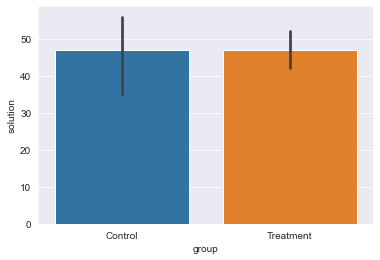

In [44]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "solution", data = dataBinary_milestones_valid)
plt.show()

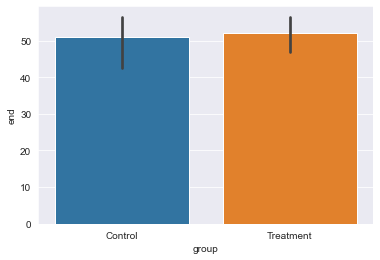

In [45]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "end", data = dataBinary_milestones_valid)
plt.show()

In [ ]:
#dataBinary

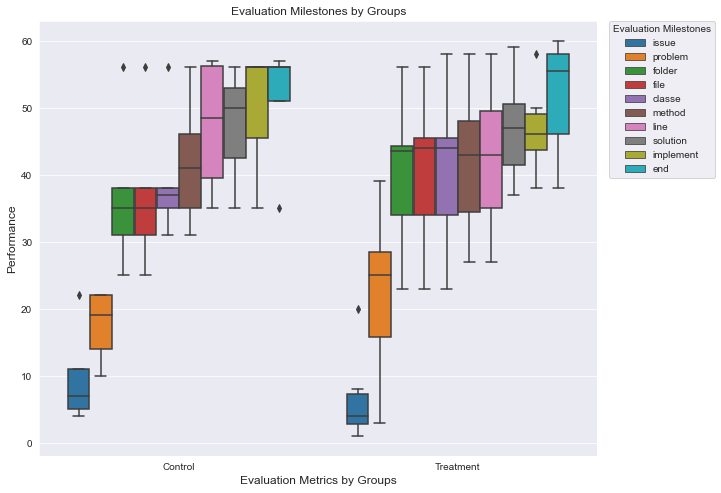

In [46]:
dd=pd.melt(dataBinary_milestones_valid,id_vars=['group'],value_vars=['issue','problem','folder','file','classe','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','classe','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")


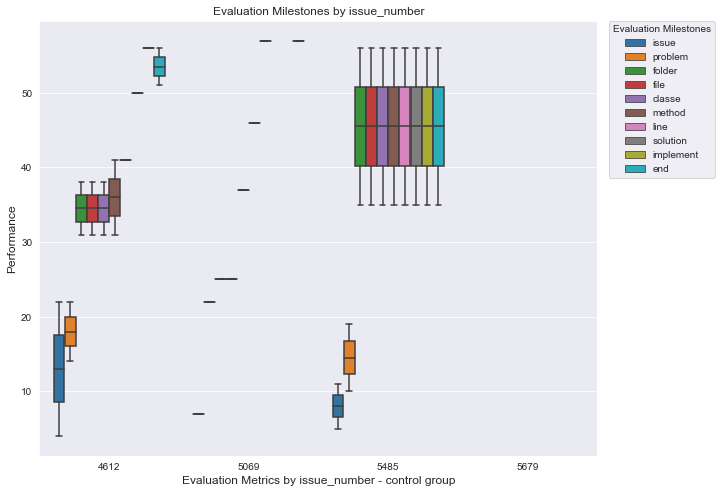

In [47]:
dd=pd.melt(dataBinary_milestones_valid_C,id_vars=['issue_number'],value_vars=['issue','problem','folder','file','classe','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='issue_number',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by issue_number - control group",size=12)

labels=['issue','problem','folder','file','classe','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by issue_number", size=12)
plt.show()

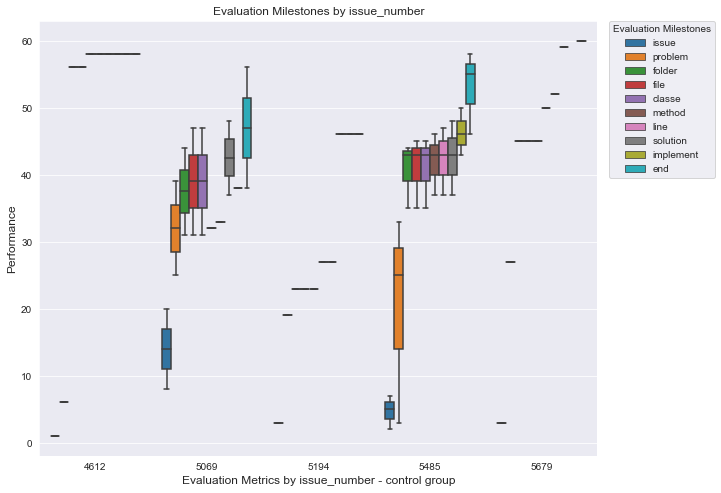

In [48]:
dd=pd.melt(dataBinary_milestones_valid_T,id_vars=['issue_number'],value_vars=['issue','problem','folder','file','classe','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='issue_number',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by issue_number - control group",size=12)

labels=['issue','problem','folder','file','classe','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by issue_number", size=12)
plt.show()

In [49]:
dataBinary_milestones_valid_5485 = dataBinary_milestones_valid[dataBinary_milestones_valid.issue_number == 5485]

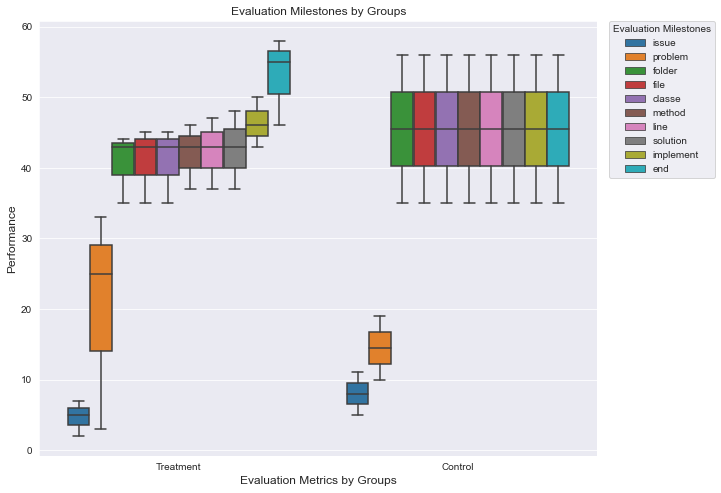

In [50]:
dd=pd.melt(dataBinary_milestones_valid_5485,id_vars=['group'],value_vars=['issue','problem','folder','file','classe','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','classe','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")

In [51]:
dataBinary_milestones_valid_5485

,Participant,start,issue,problem,folder,file,classe,method,line,solution,implement,end,group,issue_number
1,FelipeFelixSantos@gmail.com,10:15 AM,2.0,3.0,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55.0,Treatment,5485
7,kv582@nau.edu,12:44 PM,11.0,19.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,Control,5485
8,vg588@nau.edu,4:34 PM,5.0,25.0,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46.0,Treatment,5485
9,ma3932@nau.edu,4:13 PM,7.0,33.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58.0,Treatment,5485
14,st2364@nau.edu,3:09 PM,5.0,10.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,Control,5485


In [52]:
dataBinary_milestones_valid_5485.groupby(['group']).mean()

,issue,problem,folder,file,classe,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,8.000000,14.500000,45.500000,45.5,45.5,45.5,45.500000,45.500000,45.500000,45.5,5485.0
Treatment,4.666667,20.333333,40.666667,41.0,41.0,42.0,42.333333,42.666667,46.333333,53.0,5485.0


In [53]:
dataBinary_milestones_valid_4612 = dataBinary_milestones_valid[dataBinary_milestones_valid.issue_number == 4612]

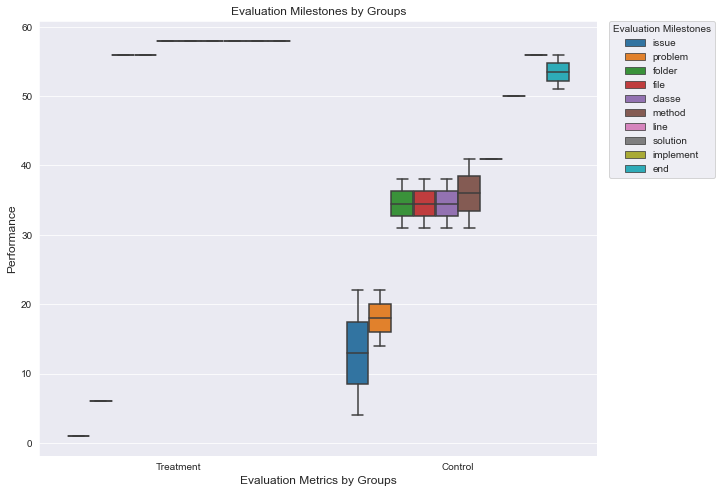

In [54]:
dd=pd.melt(dataBinary_milestones_valid_4612,id_vars=['group'],value_vars=['issue','problem','folder','file','classe','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','classe','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")

In [55]:
dataBinary_milestones_valid_4612.groupby(['group']).mean()

,issue,problem,folder,file,classe,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,13.0,18.0,34.5,34.5,34.5,36.0,41.0,50.0,56.0,53.5,4612.0
Treatment,1.0,6.0,56.0,56.0,58.0,58.0,58.0,58.0,58.0,58.0,4612.0


In [56]:
dataBinary_milestones_valid_4612

,Participant,start,issue,problem,folder,file,classe,method,line,solution,implement,end,group,issue_number
2,gk325@nau.edu,3:09:00 PM,1.0,6.0,56.0,56.0,58.0,58.0,58.0,58.0,58.0,58.0,Treatment,4612
4,gummadisk99@gmail.com,1:20 PM,4.0,14.0,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56.0,Control,4612
11,sm4332@nau.edu,3:12 PM,22.0,22.0,31.0,31.0,31.0,31.0,NaN,NaN,NaN,51.0,Control,4612


In [57]:
dataBinary_milestones_valid_5069 = dataBinary_milestones_valid[dataBinary_milestones_valid.issue_number == 5069]

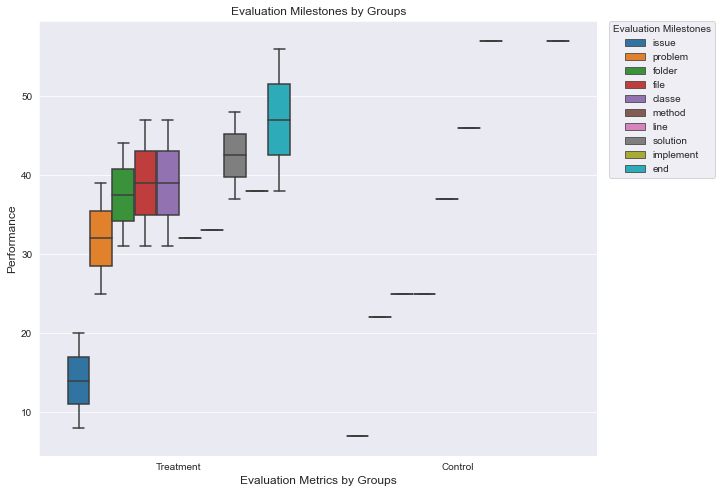

In [58]:
dd=pd.melt(dataBinary_milestones_valid_5069,id_vars=['group'],value_vars=['issue','problem','folder','file','classe','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','classe','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")

In [59]:
dataBinary_milestones_valid_5069.groupby(['group']).mean()

,issue,problem,folder,file,classe,method,line,solution,implement,end,issue_number
group,,,,,,,,,,,
Control,7.0,22.0,25.0,25.0,37.0,46.0,57.0,NaN,NaN,57.0,5069.0
Treatment,14.0,32.0,37.5,39.0,39.0,32.0,33.0,42.5,38.0,47.0,5069.0


In [60]:
dataBinary_milestones_valid_5069

,Participant,start,issue,problem,folder,file,classe,method,line,solution,implement,end,group,issue_number
5,hk486@nau.edu,3:22 PM,20.0,25.0,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38.0,Treatment,5069
10,"nk545@nau,edu",3:14 PM,7.0,22.0,25.0,25.0,37.0,46.0,57.0,NaN,NaN,57.0,Control,5069
12,jk2396@nau.edu,5:03 PM,8.0,39.0,44.0,47.0,47.0,NaN,NaN,48.0,NaN,56.0,Treatment,5069


In [ ]:
dataBinary_h1.nlargest(50,['Precision','Fmeasure_Score'])

In [ ]:
dataBinary_h1_doc2vec.nlargest(50,['Precision','Fmeasure_Score'])

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='AUC-PR',x='Algorithm',data=dataBinary_h1)
plt.ylabel("AUCpr distribution", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Binary Relevance - AUCpr Analysis", size=12)
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='hamming_loss_avg',x='Algorithm',data=dataBinary_h1)
plt.ylabel("Hamming Loss Average distribution", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Binary Relevance - Hamming Loss Analysis", size=12)
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='Accuracy_Score_not_normalized',x='Algorithm',data=dataBinary_h1)
plt.ylabel("PR's correctly predicted", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Binary Relevance - Number of PR correctly predict considering all APIs", size=12)
plt.show()

In [ ]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

In [ ]:
#https://machinelearningmastery.com/effect-size-measures-in-python/
#Small Effect Size: d=0.20
#Medium Effect Size: d=0.50
#Large Effect Size: d=0.80

from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s


In [ ]:
#Subsetting data to compute Stats

RF_binary = dataBinary_h1[dataBinary_h1.Algorithm == 'RandomForest']
RF_FMeasure = RF_binary['Fmeasure_Score']

RF_binary_doc2vec = dataBinary_h1_doc2vec[dataBinary_h1_doc2vec.Algorithm == 'RandomForest']
RF_FMeasure_doc2vec = RF_binary_doc2vec['Fmeasure_Score']

#LogisticRegression_binary = dataBinary[dataBinary.Algorithm == 'LogisticRegression']
#LogisticRegression_FMeasure = LogisticRegression_binary['Fmeasure_Score']

#MLPC_binary = dataBinary[dataBinary.Algorithm == 'MLPClassifier']
#MLPC_FMeasure = MLPC_binary['Fmeasure_Score']

#DT_binary = dataBinary[dataBinary.Algorithm == 'DecisionTree']
#DT_FMeasure = DT_binary['Fmeasure_Score']

#MlkNN_binary = dataBinary[dataBinary.Algorithm == 'MLkNN']
#MlkNN_FMeasure = MlkNN_binary['Fmeasure_Score']




In [ ]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(RF_FMeasure, RF_FMeasure_doc2vec)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

   
#Effect_Size RandomForest Vs others   
print(cliffsDelta(RF_FMeasure, RF_FMeasure_doc2vec))

#print(cliffsDelta(RF_FMeasure, LogisticRegression_FMeasure))
#print(cliffsDelta(RF_FMeasure, MLPC_FMeasure))
#print(cliffsDelta(RF_FMeasure, DT_FMeasure))
#print(cliffsDelta(RF_FMeasure, MlkNN_FMeasure)) #divisionByZero error

#Effect_Size LogisticRegression Vs others#
#print(cliffsDelta(LogisticRegression_FMeasure, MLPC_FMeasure))
#print(cliffsDelta(LogisticRegression_FMeasure, DT_FMeasure))
#print(cliffsDelta(LogisticRegression_FMeasure, MlkNN_FMeasure))

#Effect_Size MLPC Vs others
#print(cliffsDelta(MLPC_FMeasure, DT_FMeasure))
#print(cliffsDelta(MLPC_FMeasure, MlkNN_FMeasure))

#Effect_Size MlkNN Vs others
#print(cliffsDelta(MlkNN_FMeasure,DT_FMeasure))


In [ ]:
### Wilcoxon paired and dependent samples

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

#from scipy.stats import wilcoxon

#stat, p = wilcoxon(data1, data2)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha:
#	print('Same distribution (fail to reject H0)')
#else:
#	print('Different distribution (reject H0)')

In [ ]:
ConfusionMatrix =  './experiment/new/powertoys_w2v/powertoys_w2v_CM(1, 1)895Yes0.2RandomForest0.csv'
#classifierChain = './experiment/dfTesteClassifierChain_13Labels.csv'


CM = pd.read_csv(ConfusionMatrix, sep=",")

In [ ]:
#parsing Confusion matrix 

list(CM.columns) 
type(CM['0'])

columns = ['Label','TN', 'FP','FN','TP']
df = pd.DataFrame(columns=columns)

df['Label'], df['TN'], df['FP'], df['FN'], df['TP'] = CM['0'].str.split(',', 5).str
df = df.drop(0)


In [ ]:
df